In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.linalg import hilbert

## Ayudantía 5

Vamos a ver los códigos de métodos iterativos para el cálculo de valores propios no simétricos.

Recordamos que $x\neq0$ es el vector propio asociado al valor propio $\lambda$ de $A$ si:

$$Ax=\lambda x$$

### Método de potencia

In [14]:
def potencia(A, tol=1e-14):
    """
    Input: A cuadrada
    Output: recorrido del valor propio mayor
    """
    m, n = A.shape
    x = np.zeros((1, n)) # Creamos matriz de x's (almacenamos los x's en una matriz 
                         # donde cada columna es una iteración distinta)
    x[0,0] = 1           # Inicializamos con vector de norma 2 = 1
    gamma = np.zeros(1)  # Creamos array de aprox de val's propios (almacenamos las iteraciones de gamma)
    gamma[0] = np.dot(x[0,:], A@x[0,:])
    
    error = np.linalg.norm(A@x[0,:] - gamma[0]*x[0,:])
    i = 0
    print(error)
    
    while error > tol:
        
        # Aproximación de vector propio (spdg, unitario)
        y = A@x[i]
        y = y/np.linalg.norm(y)
        
        #Actualización del array
        x = np.append(x, [y], axis=0)
        
        #Aproximación del valor propio
        # x^TAx = x^T (lambda x) = lambda x^Tx = lambda
        gamma = np.append(gamma, np.dot(x[i+1,:], A@x[i+1,:]))
        
        error = np.linalg.norm(A@x[i+1,:] - gamma[i+1]*x[i+1,:])
        print(error)
        i += 1
    
    return gamma           # Retorna el array entero para ver el camino que tomó el método

In [15]:
A = hilbert(5)

print(A)

lambda_1_array = potencia(A)
lambda_1 = np.linalg.eigvals(A)[0]

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
0.6808899405271832
0.14021366612915148
0.018853623314592744
0.0025094062520674303
0.0003339386706883166
4.4438667035137076e-05
5.913645786144898e-06
7.869544426516368e-07
1.0472343417334786e-07
1.3936000625217225e-08
1.8545240448566575e-09
2.4678924818236485e-10
3.28414803201203e-11
4.370284235677207e-12
5.815735909701206e-13
7.739769540857354e-14
1.0375834575940914e-14
1.5232729226890833e-15


In [12]:
print(lambda_1)
print(lambda_1_array)

1.56705069109823
[1.         1.55242253 1.56678899 1.56704606 1.56705061 1.56705069
 1.56705069 1.56705069 1.56705069 1.56705069 1.56705069 1.56705069
 1.56705069 1.56705069 1.56705069 1.56705069 1.56705069 1.56705069]


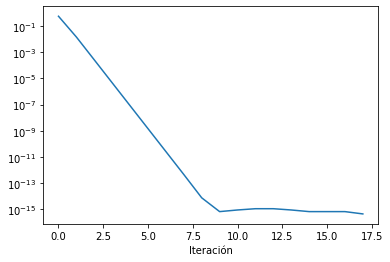

In [13]:
plt.plot(abs(lambda_1_array-lambda_1))
plt.xlabel("Iteración")
plt.yscale("log")
plt.show()

### Método de potencia inversa

Se busca el valor propio más cercano al valor $\mu$ mediante el uso del método de potencia a la matriz:

$$(A-\mu I)^{-1}$$

por ejemplo, si queremos encontrar el valor propio más cercano a $1.5$ en la matriz $A$ anterior:

In [33]:
def potencia_inv(A, mu, tol=1e-14):
    m, n = A.shape
    
    #Matriz para la iteración
    B = np.linalg.inv(A-mu*np.identity(n))
    
    x = np.zeros((1, n)) # Creamos matriz de x's (almacenamos los x's en una matriz 
                         # donde cada columna es una iteración distinta)
    x[0,0] = 1           # Inicializamos con vector de norma 1 canónico
    gamma = np.zeros(1)  # Creamos array de aprox de val's propios (almacenamos las iteraciones de gamma)
    gamma[0] = np.dot(x[0,:], A@x[0,:])
    
    error = np.linalg.norm(A@x[0,:] - gamma[0]*x[0,:])
    E_vec = [error]
    i = 0
    
    while error > tol:
        
        # Aproximación de vector propio (spdg, unitario)
        y = B@x[i]
        y = y/np.linalg.norm(y)
        
        #Actualización del array
        x = np.append(x, [y], axis=0)
        
        #Aproximación del valor propio
        gamma = np.append(gamma, np.dot(x[i+1,:], A@x[i+1,:]))
        
        error = np.linalg.norm(A@x[i+1,:] - gamma[i+1]*x[i+1,:])
        E_vec.append(error)
        #print(error)
        i += 1
    return gamma  #Retorna el array entero para ver el camino que tomó el método

In [19]:
vals = np.linalg.eigvals(A)
print(vals)

[1.56705069e+00 2.08534219e-01 1.14074916e-02 3.05898040e-04
 3.28792877e-06]


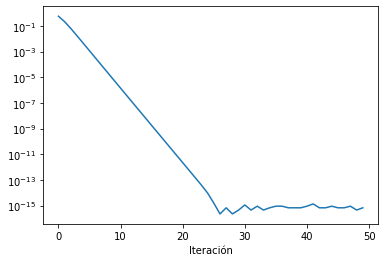

In [23]:
mu=3
lambda_cercano = potencia_inv(A, mu=mu)

plt.plot(abs(lambda_cercano-vals[0]))
plt.xlabel("Iteración")
plt.yscale("log")
plt.show()

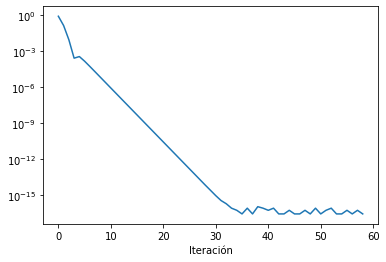

In [27]:
mu=0.5
lambda_cercano, E_vec = potencia_inv(A, mu=mu)

plt.plot(abs(lambda_cercano-vals[1]))
plt.xlabel("Iteración")
plt.yscale("log")
plt.show()

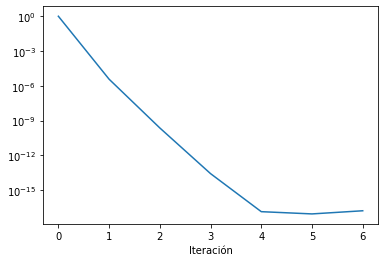

In [34]:
mu=0
lambda_cercano = potencia_inv(A, mu=mu)

plt.plot(abs(lambda_cercano-vals[-1]))
plt.xlabel("Iteración")
plt.yscale("log")
plt.show()

### Iteración Ortogonal

Dada una matriz ortogonal inicial $Q_0\in\mathbb{C}^{n\times r}, 1\leq r\leq n$, este método genera una cadena de matrices ortogonales $\{Q_k\}$ tal que se obtienen los valores propios de $A\in\mathbb{C}^{n\times n}$.

Con esto, logramos generar los primeros $r$ valores propios de mayor módulo.

In [35]:
def It_Ortogonal(A, Q0, tol=1e-14):
    """
    Input: A de nxn
           Q0 de nxr 
    """
    error = 1
    Y = A@Q0
    vals_0 = (Q0.conj().T)@A@Q0
    Q1, R1 = np.linalg.qr(Y)
    
    i = 0
    while error > tol:
        
        Y = A@Q1
        Q0 = Q1
        
        Q1, R1 = np.linalg.qr(Y)
        vals_1 = (Q1.conj().T)@A@Q1
        
        print(vals_1)
        error = np.linalg.norm(vals_0-vals_1)
        vals_0 = vals_1
        
    return np.diag(vals_1)

In [36]:
r = 3
Q0 = np.identity(5)[:,:r]
print(Q0)

It_Ortogonal(A, Q0)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1.56678899e+00 1.88535472e-02 5.35599510e-05]
 [1.88535472e-02 2.08792669e-01 8.01175901e-04]
 [5.35599510e-05 8.01175901e-04 1.14107289e-02]]
[[1.56704606e+00 2.50940622e-03 3.89934798e-07]
 [2.50940622e-03 2.08538844e-01 4.37835319e-05]
 [3.89934798e-07 4.37835319e-05 1.14075013e-02]]
[[1.56705061e+00 3.33938671e-04 2.83857122e-09]
 [3.33938671e-04 2.08534301e-01 2.39505724e-06]
 [2.83857133e-09 2.39505724e-06 1.14074917e-02]]
[[1.56705069e+00 4.44386670e-05 2.06636616e-11]
 [4.44386670e-05 2.08534220e-01 1.31017283e-07]
 [2.06637464e-11 1.31017283e-07 1.14074916e-02]]
[[1.56705069e+00 5.91364579e-06 1.50623794e-13]
 [5.91364579e-06 2.08534219e-01 7.16706624e-09]
 [1.50539054e-13 7.16706623e-09 1.14074916e-02]]
[[1.56705069e+00 7.86954442e-07 1.20795768e-15]
 [7.86954443e-07 2.08534219e-01 3.92061597e-10]
 [1.23802490e-15 3.92061586e-10 1.14074916e-02]]
[[ 1.56705069e+00  1.04723434e-07 -8.33205095e-19]
 [ 1.04723434e-07 

array([1.56705069, 0.20853422, 0.01140749])

### Algoritmo QR

Muy choro y famoso!

$$Q^{(k)}R^{(k)} = A^{(k)}$$
$$A^{(k+1)} = R^{(k)}Q^{(k)}$$

In [37]:
def QR_noshift(A, tol=1e-14):
    '''
    Función que reealiza el algoritmo QR sin shift (clásico)
    Input:  args:   - Matriz A compleja cuadrada
            kwargs: - tol: tolerancia de error
    Output: vector de valores propios de A
    '''
    
    B = np.copy(A) # Creamos B para no sobreescribir A
    error = 1      # Error inicial
    
    while error > tol:
        check = False
        
        Q,R = np.linalg.qr(B)
        B_tilde = R@Q
        
        # Stop condition
        # Que otra condición podemos imponer?
        error = np.linalg.norm(abs(B_tilde-B))
        #error = |R - B@Q.conj().T|
        
        #Actualización para siguiente iteración
        B = B_tilde

    return np.diag(B)

In [38]:
QR_noshift(A)

array([1.56705069e+00, 2.08534219e-01, 1.14074916e-02, 3.05898040e-04,
       3.28792877e-06])

### Algoritmo QR con shift

No lo vamos a programar por la alta similitud con algunos anteriores. Que deberíamos darle ahora a la función como input también? 

In [14]:
#Codigo QR con shift

### Reducción de Hessenberg

In [39]:
def is_Hessenberg(A, tol=1e-14):
    '''
    Retorna True si A es Hessenberg con 
    tolerancia de tol
    '''
    m, n =  A.shape
    for i in range(2, m):
        for j in range(n-2):
            if A[i,j] > tol:
                return False
    return True

def Hessenberg(A):
    '''
    Retorna el par de matrices H, Q tales que
    A = QHQ*
    H: matriz Hessenberg superior
    '''
    m, n = A.shape
    H = np.copy(A)
    Q = np.identity(m)
    
    if not is_Hessenberg(A):
        
        for k in range(m-2):
            
            #Proyecciones de Householder
            x = H[k+1:, k]
            Lx = x.shape[0]
            
            #vector unitario
            v = x + np.sign(x[0])*np.linalg.norm(x, ord=2)*np.eye(1, M=Lx)[0]
            v = v/np.linalg.norm(v)
            
            #Matriz que cambia los vectores
            Pk = np.eye(Lx) - 2*np.outer(v, v.conj())
            H[k+1:,k:] = Pk@H[k+1:,k:]
            H[:,k+1:] = H[:,k+1:]@Pk
            
            #Actualización de la matriz
            Q[k+1:,k:] = Pk@Q[k+1:,k:]
            
    return H, Q

In [41]:
H, Q = Hessenberg(A)

print(H)

print(np.linalg.eigvals(H))
print(np.linalg.eigvals(A))

#Preservan los valores propios

[[ 1.00000000e+00 -6.80889941e-01 -6.88747607e-17  1.94720083e-17
  -5.91535713e-18]
 [-6.80889941e-01  7.43986990e-01  9.14099159e-02 -3.19063106e-17
   3.49560825e-17]
 [ 4.07128447e-17  9.14099159e-02  4.24131920e-02  2.69495444e-03
  -3.47120927e-18]
 [ 4.92696471e-17 -6.47330076e-18  2.69495444e-03  8.92717312e-04
  -4.11369162e-05]
 [ 3.27543795e-17 -9.15450447e-18  2.13901663e-19 -4.11369162e-05
   8.68834785e-06]]
[1.56705069e+00 2.08534219e-01 1.14074916e-02 3.05898040e-04
 3.28792877e-06]
[1.56705069e+00 2.08534219e-01 1.14074916e-02 3.05898040e-04
 3.28792877e-06]


## Valores propios de una matriz perturbada



$$A + E,\quad \|E\| = \varepsilon$$

Vamos a plotear los valores propios de distintas matrices y sus números de condición.
Que vamos a darle a nuestro programa?
- `A`: Matriz inicial
- `err`: Perturbación de la matriz

Que podemos decir del pseudoespectro de las matrices que vamos a ver a medida que aumenta `err` y el número de condición de $A$?

In [42]:
def rutina(A, err_list):
    """
    Hace lo que dijimos antes
    """
    
    m, n = A.shape
    vals = np.linalg.eigvals(A)
    
    real_side = np.random.random((m, n))
    complex_side = np.random.random((m, n))
    
    fig, ax = plt.subplots(2, 3, figsize=(24,16))
    
    f = lambda L: np.linalg.svd(A - L*np.identity(m))[1][-1]
    
    for i, err in enumerate(err_list):
    
        #Perturbación real de norma err
        real_pert = err*(real_side/np.linalg.norm(real_side))

        #Perturbación compleja de norma err
        complex_pert = real_side + 1j*complex_side
        complex_pert = err*(complex_pert/np.linalg.norm(complex_pert))

        B = real_pert + A
        C = complex_pert + A

        vals_real_pert = np.linalg.eigvals(B)
        vals_comp_pert = np.linalg.eigvals(C)

        #Numero de condición
        cond_A = np.linalg.cond(A)

        #limites eje X
        min1, min2, min3 = min(vals.real), min(vals_real_pert.real), min(vals_comp_pert.real)
        min_x = min(min1, min2, min3)

        max1, max2, max3 = max(vals.real), max(vals_real_pert.real), max(vals_comp_pert.real)
        max_x = max(max1, max2, max3)
        
        #limites eje Y
        min1, min2, min3 = min(vals.imag), min(vals_real_pert.imag), min(vals_comp_pert.imag)
        min_y = min(min1, min2, min3)

        max1, max2, max3 = max(vals.imag), max(vals_real_pert.imag), max(vals_comp_pert.imag)
        max_y = max(max1, max2, max3)
        
        #Mesh para contour plot
        nx, ny = 200, 200
        t1 = np.linspace(min_x, max_x, nx)
        t2 = np.linspace(min_y, max_y, ny)
        X, Y = np.meshgrid(t1, t2)
        X, Y = X.flatten(), Y.flatten()
        
        Z = np.array([f(x+1j*y) for (x,y) in zip(X,Y)])
        
        X = np.reshape(X, (nx, ny))
        Y = np.reshape(Y, (nx, ny))
        Z = np.reshape(Z, (nx, ny))
        
        #Scatterplot
        ax[0,i].scatter(vals.real, vals.imag, marker="o", label="val propios originales", s=100)
        ax[0,i].scatter(vals_real_pert.real, vals_real_pert.imag, marker="x", label="val propios pert real", s=100)
        ax[0,i].scatter(vals_comp_pert.real, vals_comp_pert.imag, marker="*", label="val propios pert compleja", s=100)
        ax[0,i].plot(t1, np.zeros(nx), "k-", lw=1) #Eje Real (Im(z)=0)
        ax[0,i].set_xlabel("Re(x)", fontsize=14)
        ax[0,i].set_ylabel("Im(x)", fontsize=14)
        ax[0,i].set_title(f"Perturbación: {err:.1e}", fontsize=16)
        ax[0,i].legend(loc="best")
        
        #Contourplot
        cs = ax[1,i].contourf(X, Y, Z, levels=50)#, locator=ticker.LogLocator())
        fig.colorbar(cs, ax=ax[1,i], shrink=0.9)
        
    
    plt.suptitle(f"Numero de condición de A: {cond_A:.3f}", fontsize=16)
    plt.show()
    
    pass


$A_1$ es random normal (0,1) de 5x5 

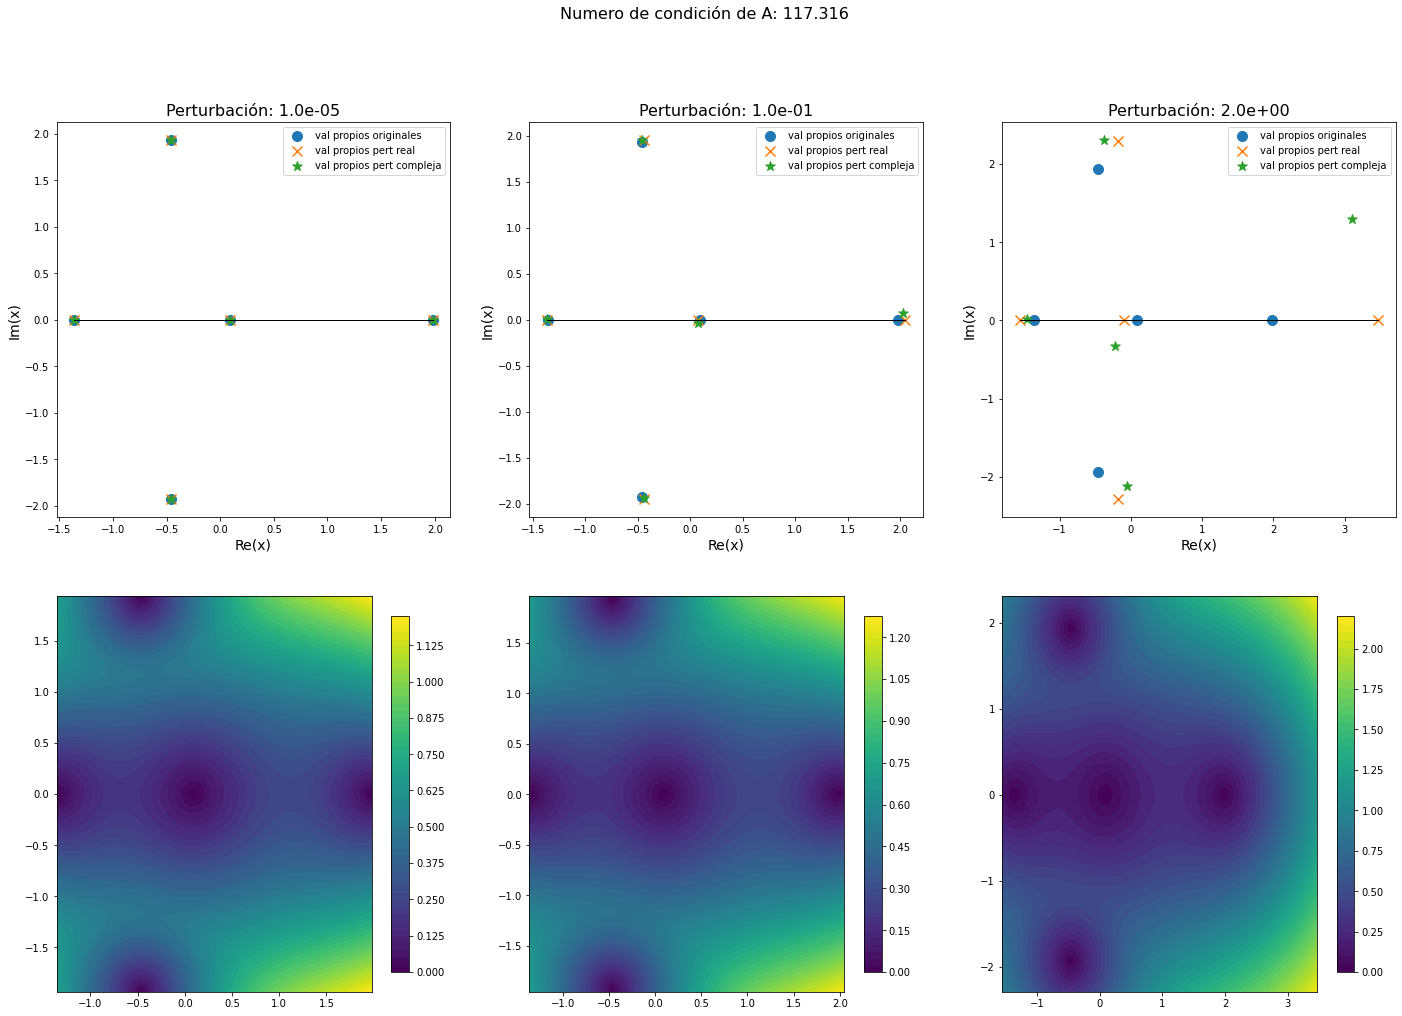

In [44]:
A1 = np.random.randn(25).reshape((5,5))
rutina(A1, [1e-5, 1e-1, 2])

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


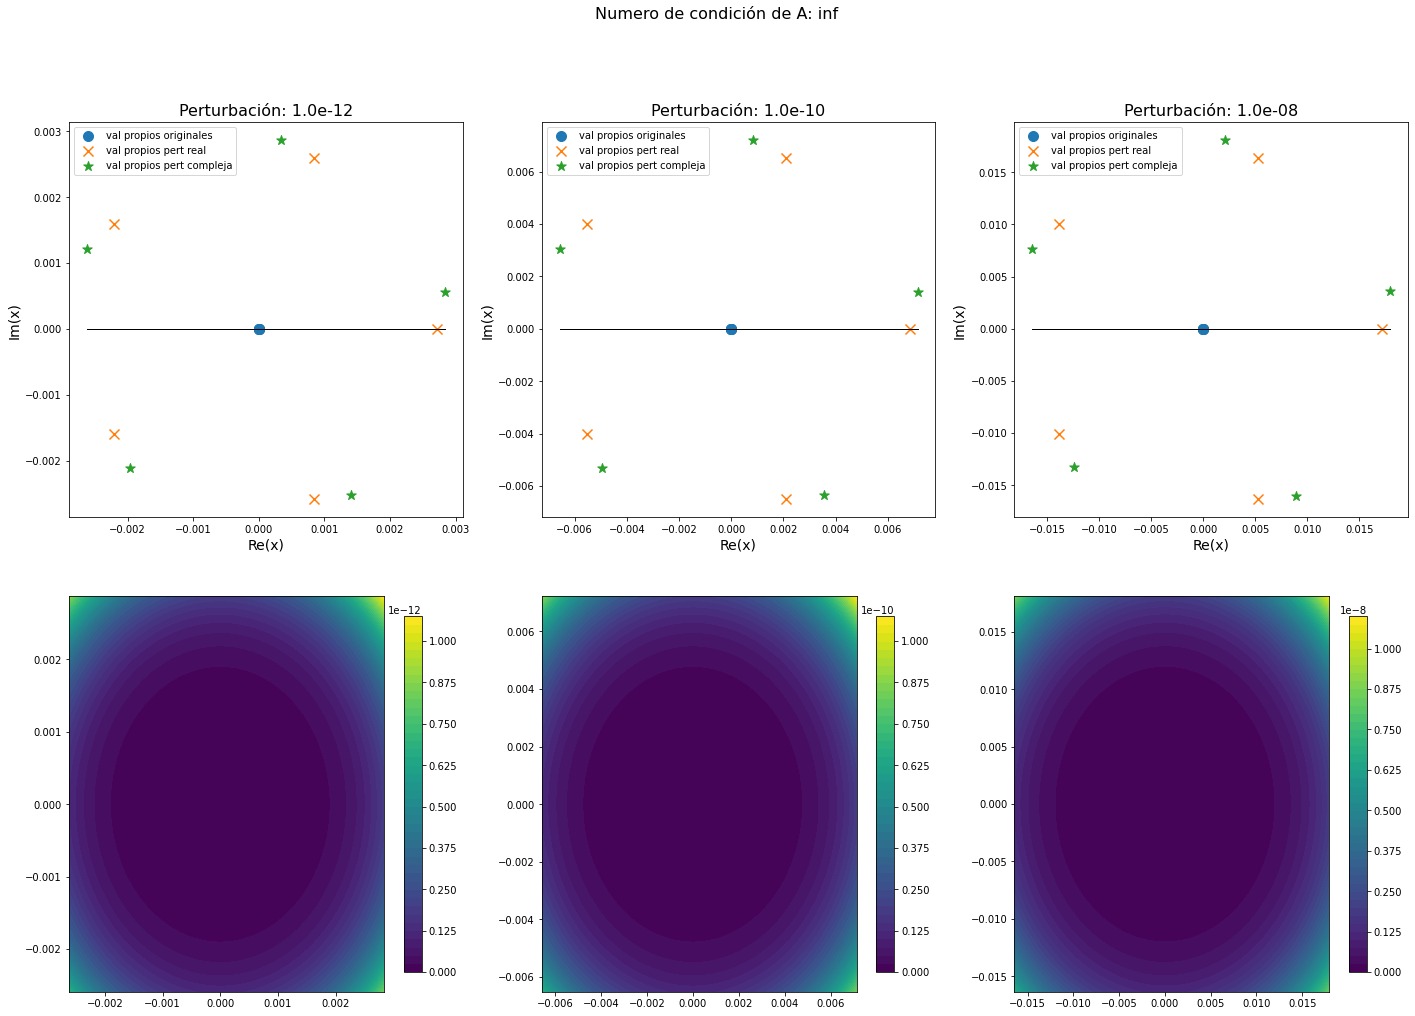

In [45]:
A2 = np.diag(np.ones(4, dtype=float), 1)
print(A2)
rutina(A2, [1e-12, 1e-10, 1e-8])

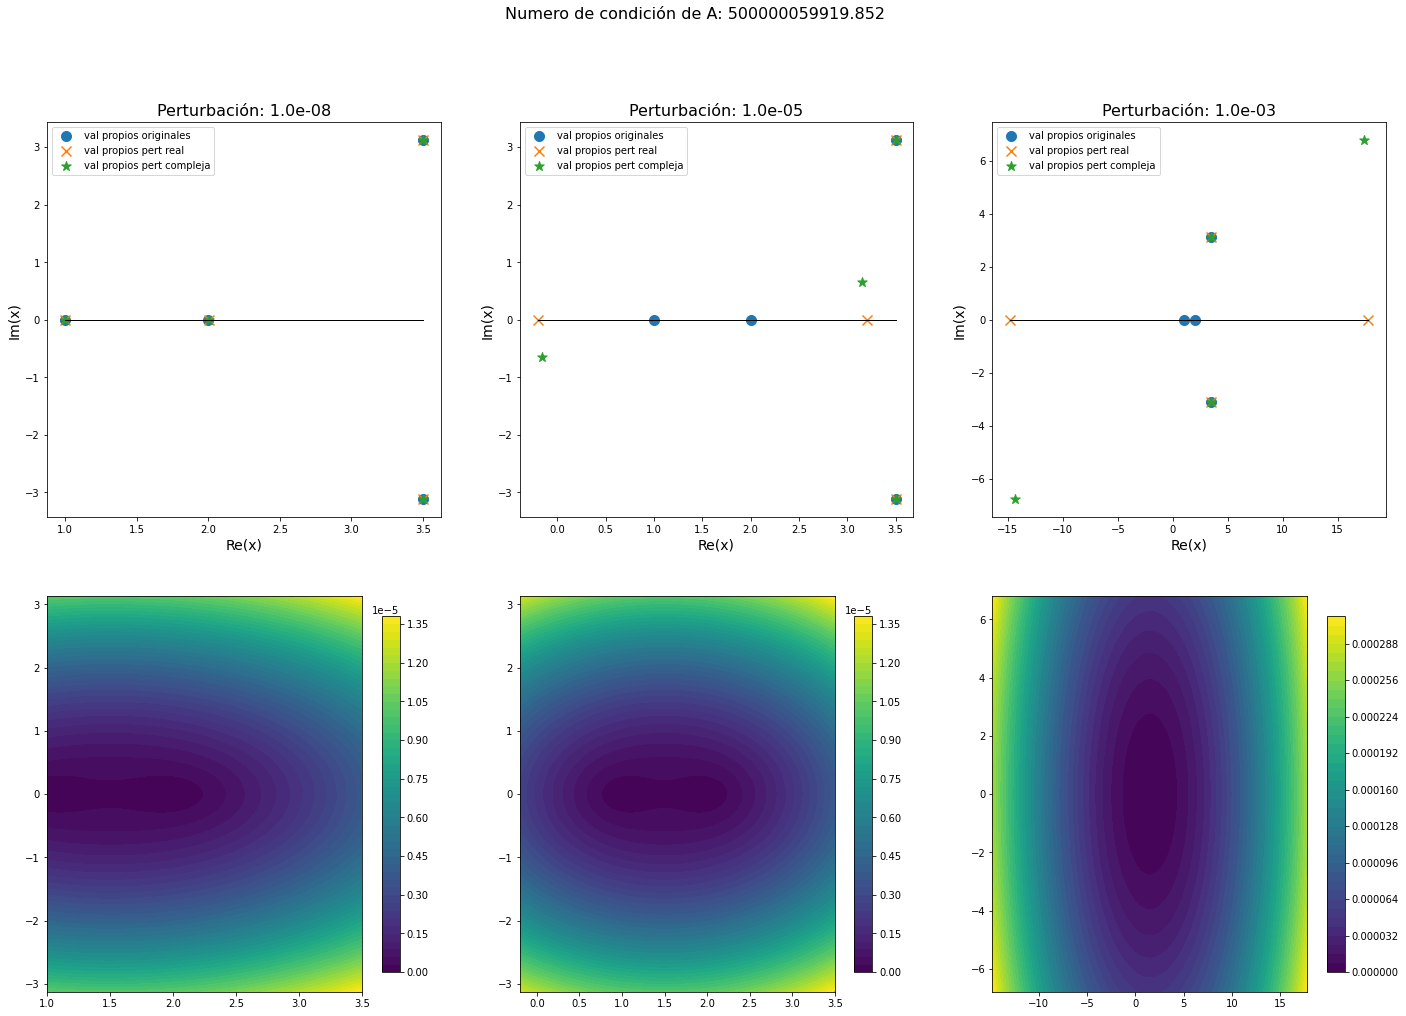

In [47]:
A3 = np.array([[1, 1e6, 0, 0],
               [0, 2, 1e-3, 0],
               [0, 0,  3, 10],
               [0, 0, -1, 4]])
rutina(A3, [1e-8, 1e-5, 1e-3])

Versiones del pseudoespectro:

$$\begin{align*}\Lambda_{\varepsilon}(A) &= \{z\in\mathbb{C}: \sigma_{min}(A-\lambda I)\leq \varepsilon\}\\
&=\{z\in\mathbb{C}: \|A-\lambda I\|_2\geq 1/\varepsilon\}\\
&=\{z\in\mathbb{C}: z\in\Lambda(A+E):\|E\|_2\leq \varepsilon\}\\
\end{align*}$$

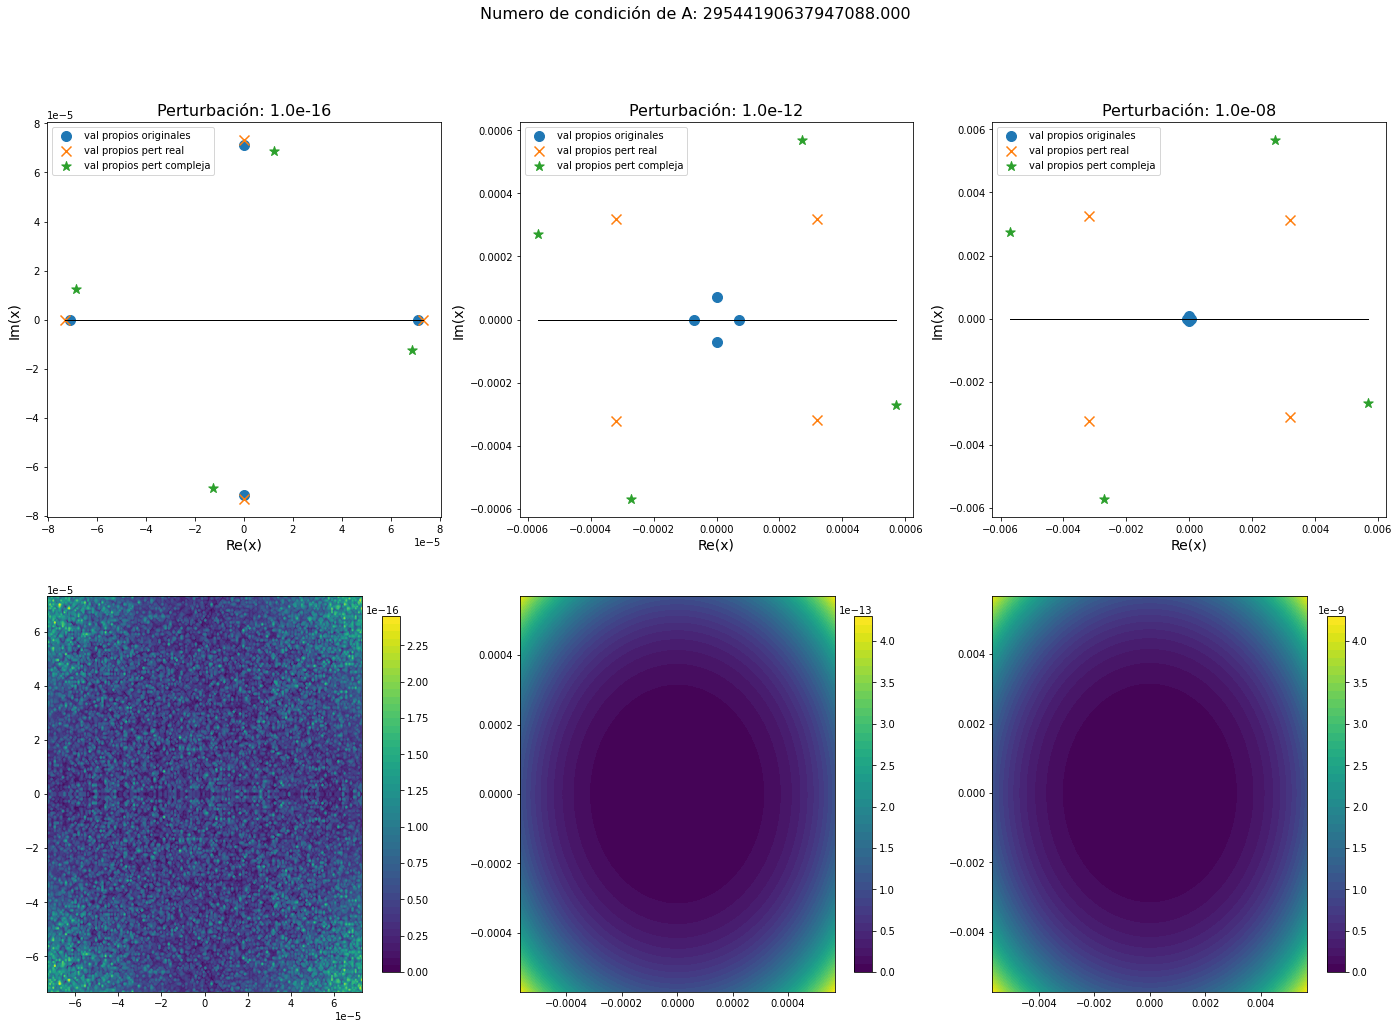

In [48]:
Q4, R4 = np.linalg.qr(np.random.randn(16).reshape((4,4)))
A4 = Q4@np.diag(np.ones(3), 1)@Q4.conj().T
rutina(A4, [1e-16, 1e-12, 1e-8])

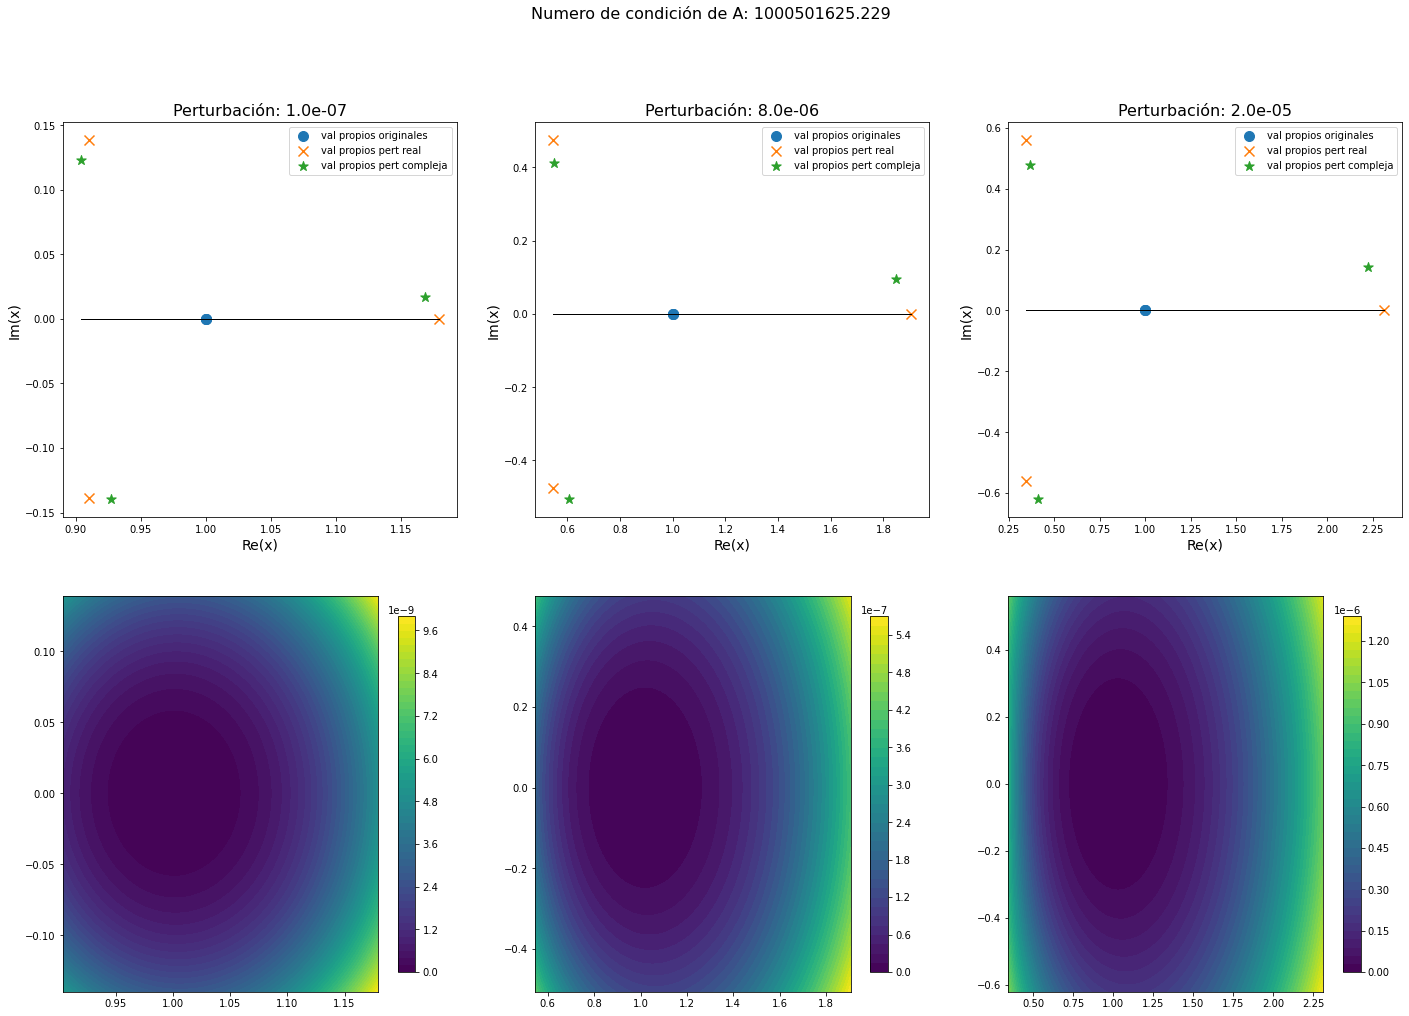

In [31]:
A5 = np.array([[1, 1e3, 1e6],
               [0, 1, 1e3],
               [0, 0, 1]])
rutina(A5, [1e-7, 8e-6, 2e-5])

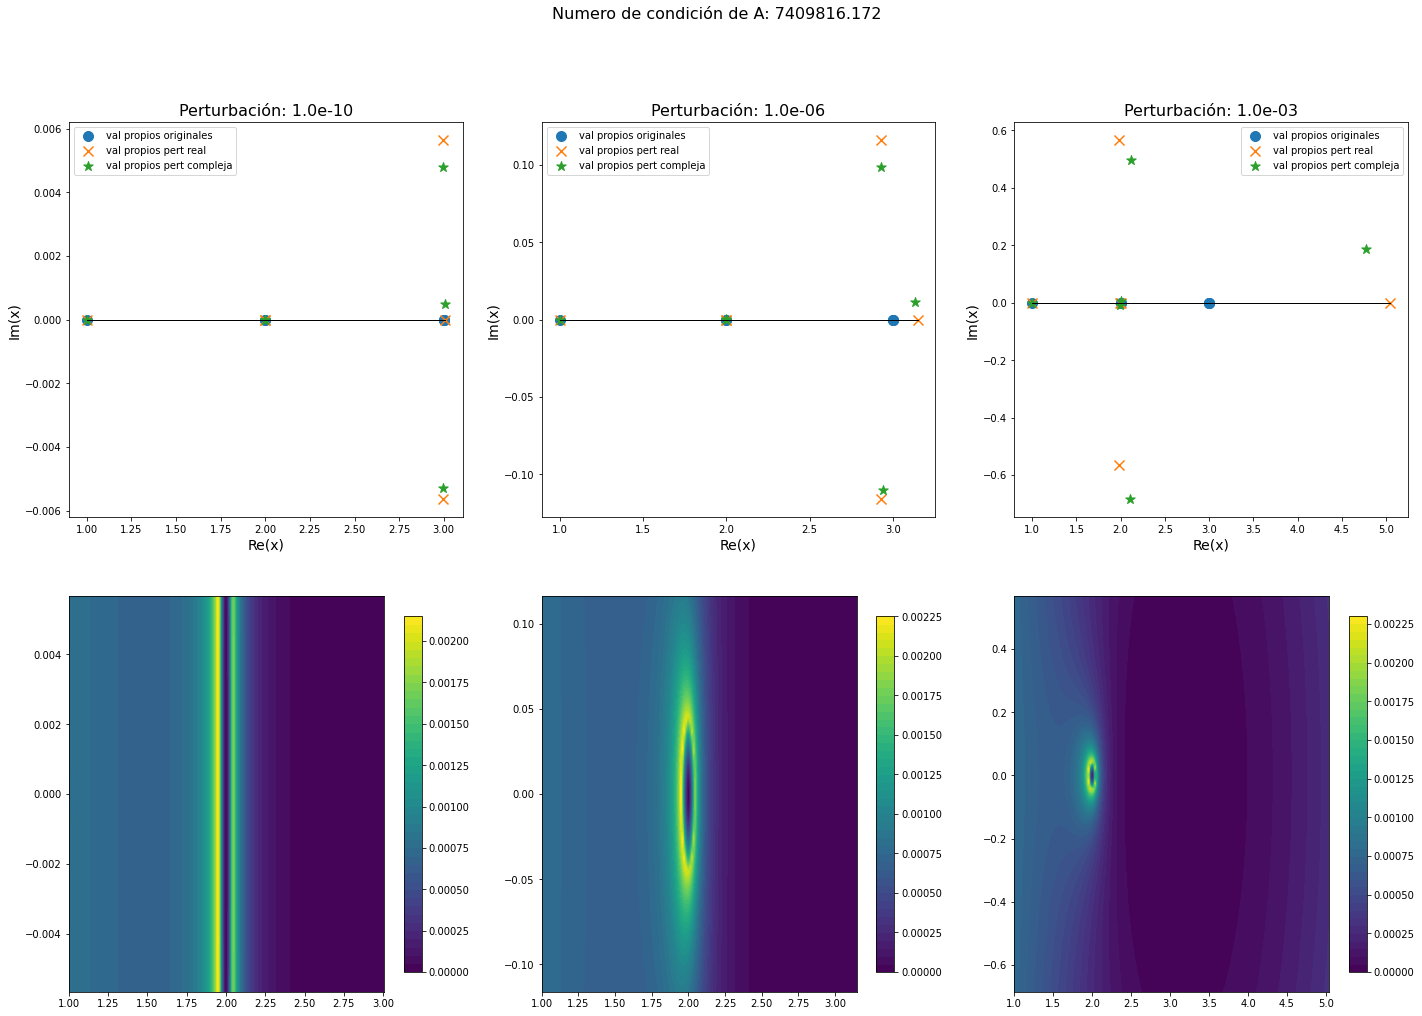

In [32]:
A6 = np.array([[1,0,0,0,0,0],
               [0,2,1,0,0,0],
               [0,0,2,0,0,0],
               [0,0,0,3,1e2,1e4],
               [0,0,0,0,3,1e2],
               [0,0,0,0,0,3]])

rutina(A6, [1e-10, 1e-6, 1e-3])

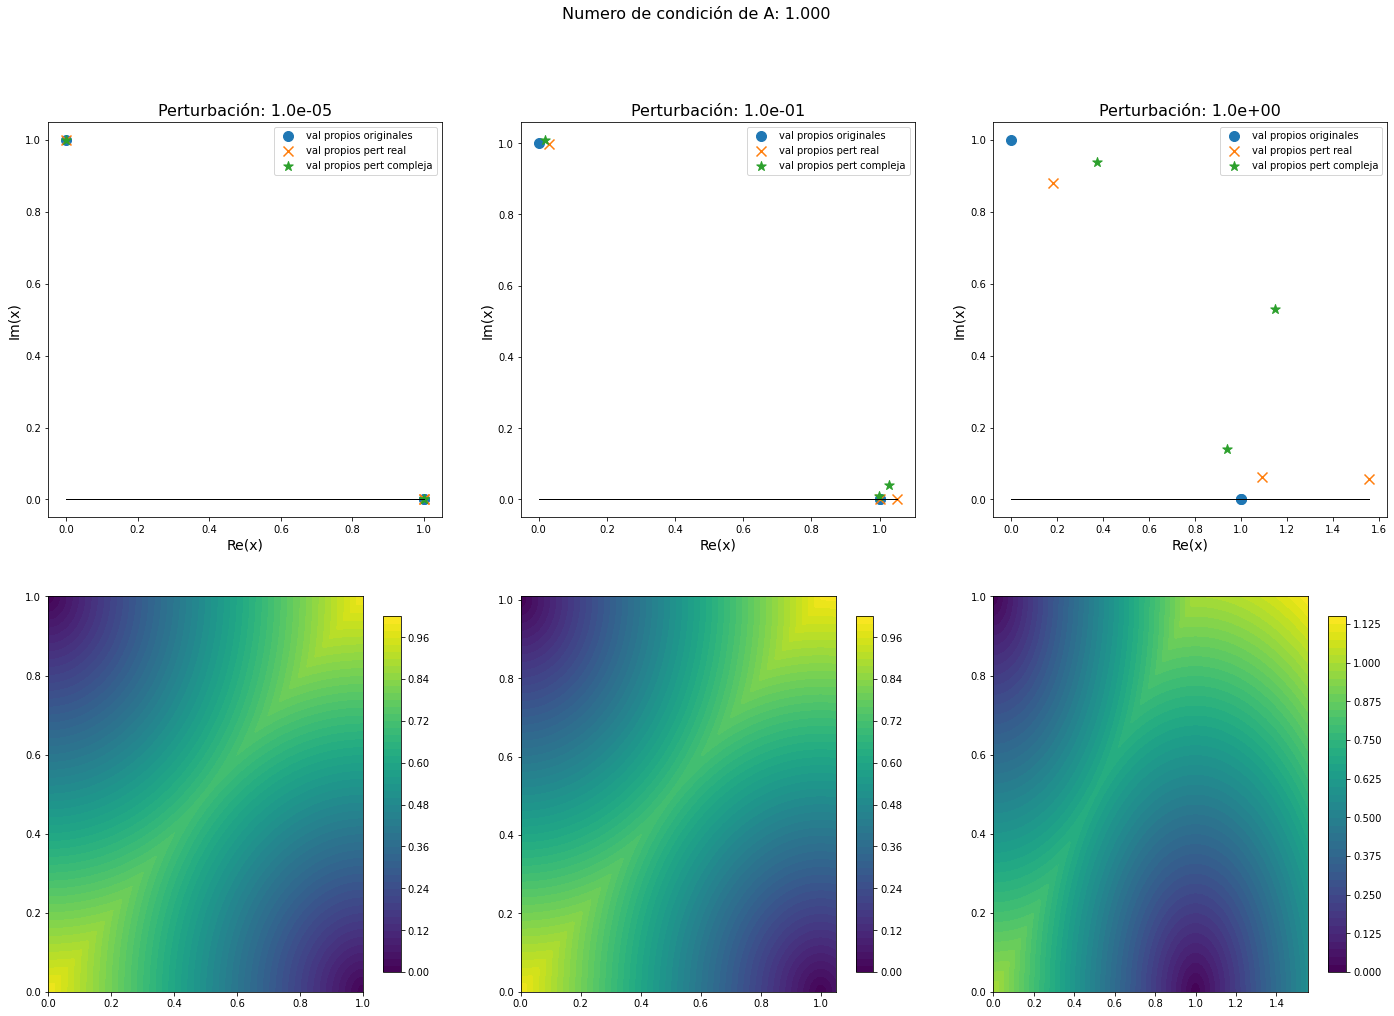

In [52]:
A7 = np.array([[1j,0,0],[0,1,0],[0,0,1]])
rutina(A7, [1e-5, 1e-1, 1])